# Remy Wang

In [3]:
import pandas as pd
df =pd.read_excel(io=r'../data/raw/default of credit card clients.xls')
df.drop("Unnamed: 0",axis=1)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## Research Question/ Interest

### How do aspects in the personal profile indicated by gender, education, marital status, and age in this dataset individually determine the number of months for payment delay? 
* Which category in the sex group affect the length of payment delay the most?
* How is feature of the education level affect the length of payment delay?
* Which martial status caused payment delay the most?
* How will the age determine the length of payment delay?

##### My analysis plan will be first dropping all the columns involved with the amount of the given credit (NT dollar), amount of bill statement (NT dollar), and amount of previous payment (NT dollar). The rest of the data frame will be saved into a new data frame and the first index column will be removed. Next, the column names for the new data frame will be renamed to more representative terms. In addition, rows with exceptional or missing values in the new data frame will also be removed. The new column which contains the average numbers of payback months from the past payment history will be created. Furthermore, one categorical variable and one numerical variable such as marital status and the average numbers of payback months will be grouped together then side-by-side, and grouped boxplots will be plotted for visualizations. 



## Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [6]:
df.shape

(30001, 25)

In [7]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [35]:
# Check to see the column name
second_columnn_name=df.iloc[0:1]
second_columnn_name

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [34]:
df.nunique(axis=0)

Unnamed: 0    30001
X1               82
X2                3
X3                8
X4                5
X5               57
X6               12
X7               12
X8               12
X9               12
X10              11
X11              11
X12           22724
X13           22347
X14           22027
X15           21549
X16           21011
X17           20605
X18            7944
X19            7900
X20            7519
X21            6938
X22            6898
X23            6940
Y                 3
dtype: int64

In [42]:
df.describe().T

,count,unique,top,freq
Unnamed: 0,30001,30001,ID,1
X1,30001,82,50000,3365
X2,30001,3,2,18112
X3,30001,8,2,14030
X4,30001,5,2,15964
X5,30001,57,29,1605
X6,30001,12,0,14737
X7,30001,12,0,15730
X8,30001,12,0,15764
X9,30001,12,0,16455


In [9]:
# Drop redudant variables
df2=df.drop(['X1','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','Y'],axis=1)
df2

,Unnamed: 0,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,ID,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,1,2,2,1,24,2,2,-1,-1,-2,-2
2,2,2,2,2,26,-1,2,0,0,0,2
3,3,2,2,2,34,0,0,0,0,0,0
4,4,2,2,1,37,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,1,3,1,39,0,0,0,0,0,0
29997,29997,1,3,2,43,-1,-1,-1,-1,0,0
29998,29998,1,2,2,37,4,3,2,-1,0,0
29999,29999,1,3,1,41,1,-1,0,0,0,-1


In [11]:
# Renaming the first index row to more reasonable name
df3=df2.rename({'Unnamed: 0':'ID','X2':'SEX','X3':'EDUCATION','X4':'MARRIAGE','X5':'AGE','X6':'PAY_0','X7':'PAY_2','X8':'PAY_3','X9':'PAY_4','X10':'PAY_5','X11':'PAY_6',},axis='columns')
df3

,ID,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,ID,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,1,2,2,1,24,2,2,-1,-1,-2,-2
2,2,2,2,2,26,-1,2,0,0,0,2
3,3,2,2,2,34,0,0,0,0,0,0
4,4,2,2,1,37,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,1,3,1,39,0,0,0,0,0,0
29997,29997,1,3,2,43,-1,-1,-1,-1,0,0
29998,29998,1,2,2,37,4,3,2,-1,0,0
29999,29999,1,3,1,41,1,-1,0,0,0,-1


In [13]:
# Drop the duplicate column name row and reset the index
df4=df3.iloc[1:].reset_index(drop=True)
df4

,ID,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,2,2,1,24,2,2,-1,-1,-2,-2
1,2,2,2,2,26,-1,2,0,0,0,2
2,3,2,2,2,34,0,0,0,0,0,0
3,4,2,2,1,37,0,0,0,0,0,0
4,5,1,2,1,57,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1,3,1,39,0,0,0,0,0,0
29996,29997,1,3,2,43,-1,-1,-1,-1,0,0
29997,29998,1,2,2,37,4,3,2,-1,0,0
29998,29999,1,3,1,41,1,-1,0,0,0,-1


In [16]:
# Replace the number variables in the categorical column to more reasonabel name
df4['SEX']=df4['SEX'].replace([1,2],['male','female'])
df4['EDUCATION']=df4['EDUCATION'].replace([1,2,3,4],['graduate school','university', 'high school','others'])
df4['MARRIAGE']=df4['MARRIAGE'].replace([1,2,3],['married','single','others'])
df4

,ID,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,female,university,married,24,2,2,-1,-1,-2,-2
1,2,female,university,single,26,-1,2,0,0,0,2
2,3,female,university,single,34,0,0,0,0,0,0
3,4,female,university,married,37,0,0,0,0,0,0
4,5,male,university,married,57,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,male,high school,married,39,0,0,0,0,0,0
29996,29997,male,high school,single,43,-1,-1,-1,-1,0,0
29997,29998,male,university,single,37,4,3,2,-1,0,0
29998,29999,male,high school,married,41,1,-1,0,0,0,-1


In [15]:
# Check variables' types in df4
df4.dtypes

ID           object
SEX          object
EDUCATION    object
MARRIAGE     object
AGE          object
PAY_0        object
PAY_2        object
PAY_3        object
PAY_4        object
PAY_5        object
PAY_6        object
dtype: object

In [18]:
# Change numerical column's type into numeric
df4[["AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]=df4[["AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].apply(pd.to_numeric)
df4.dtypes

ID           object
SEX          object
EDUCATION    object
MARRIAGE     object
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
dtype: object

In [21]:
df4["SEX"].unique()

array(['female', 'male'], dtype=object)

In [22]:
df4["EDUCATION"].unique()

array(['university', 'graduate school', 'high school', 5, 'others', 6, 0],
      dtype=object)

In [23]:
df4["MARRIAGE"].unique()

array(['married', 'single', 'others', 0], dtype=object)

In [24]:
df4["AGE"].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [25]:
df4["PAY_0"].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [26]:
df4["PAY_2"].unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8])

In [27]:
df4["PAY_3"].unique()

array([-1,  0,  2, -2,  3,  4,  6,  7,  1,  5,  8])

In [28]:
df4["PAY_4"].unique()

array([-1,  0, -2,  2,  3,  4,  5,  7,  6,  1,  8])

In [29]:
df4["PAY_6"].unique()

array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5])

In [36]:
# Removing rows which contain unusual values
df5=(df4
    .loc[lambda x: x['MARRIAGE']!=0]
    .loc[lambda x: x['EDUCATION']!=0]
    .loc[lambda x: x['EDUCATION']!=5]
    .loc[lambda x: x['EDUCATION']!=6]
    .reset_index(drop=True)
    )
df5

,ID,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,female,university,married,24,2,2,-1,-1,-2,-2
1,2,female,university,single,26,-1,2,0,0,0,2
2,3,female,university,single,34,0,0,0,0,0,0
3,4,female,university,married,37,0,0,0,0,0,0
4,5,male,university,married,57,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29596,29996,male,high school,married,39,0,0,0,0,0,0
29597,29997,male,high school,single,43,-1,-1,-1,-1,0,0
29598,29998,male,university,single,37,4,3,2,-1,0,0
29599,29999,male,high school,married,41,1,-1,0,0,0,-1


In [39]:
# Drop rows with NaNs
df6=df5.dropna(axis=0)
df6.shape

(29601, 11)

In [46]:
# Add the new column about the average months of repayment
df7["AverageRepaymentStatus"]=df6[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis=1)
df7

,ID,SEX,EDUCATION,MARRIAGE,AGE,"REPAYMENTSTATUS_September,2005","REPAYMENTSTATUS_August,2005","REPAYMENTSTATUS_July,2005","REPAYMENTSTATUS_June,2005","REPAYMENTSTATUS_May,2005","REPAYMENTSTATUS_April,2005",AverageRepaymentStatus
0,1,female,university,married,24,2,2,-1,-1,-2,-2,-0.333333
1,2,female,university,single,26,-1,2,0,0,0,2,0.500000
2,3,female,university,single,34,0,0,0,0,0,0,0.000000
3,4,female,university,married,37,0,0,0,0,0,0,0.000000
4,5,male,university,married,57,-1,0,-1,0,0,0,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
29596,29996,male,high school,married,39,0,0,0,0,0,0,0.000000
29597,29997,male,high school,single,43,-1,-1,-1,-1,0,0,-0.666667
29598,29998,male,university,single,37,4,3,2,-1,0,0,1.333333
29599,29999,male,high school,married,41,1,-1,0,0,0,-1,-0.166667


In [51]:
# Renaming the numerical column to more reasonable name and change the order
df8=df7.rename({'PAY_0':'REPAYMENTSTATUS_September,2005','PAY_2':'REPAYMENTSTATUS_August,2005','PAY_3':'REPAYMENTSTATUS_July,2005','PAY_4':'REPAYMENTSTATUS_June,2005','PAY_5':'REPAYMENTSTATUS_May,2005','PAY_6':'REPAYMENTSTATUS_April,2005'},axis='columns')
df9=df8[['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE','REPAYMENTSTATUS_April,2005','REPAYMENTSTATUS_May,2005','REPAYMENTSTATUS_June,2005','REPAYMENTSTATUS_July,2005','REPAYMENTSTATUS_August,2005','REPAYMENTSTATUS_September,2005','AverageRepaymentStatus']]
df9

,ID,SEX,EDUCATION,MARRIAGE,AGE,"REPAYMENTSTATUS_April,2005","REPAYMENTSTATUS_May,2005","REPAYMENTSTATUS_June,2005","REPAYMENTSTATUS_July,2005","REPAYMENTSTATUS_August,2005","REPAYMENTSTATUS_September,2005",AverageRepaymentStatus
0,1,female,university,married,24,-2,-2,-1,-1,2,2,-0.333333
1,2,female,university,single,26,2,0,0,0,2,-1,0.500000
2,3,female,university,single,34,0,0,0,0,0,0,0.000000
3,4,female,university,married,37,0,0,0,0,0,0,0.000000
4,5,male,university,married,57,0,0,0,-1,0,-1,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
29596,29996,male,high school,married,39,0,0,0,0,0,0,0.000000
29597,29997,male,high school,single,43,0,0,-1,-1,-1,-1,-0.666667
29598,29998,male,university,single,37,0,0,-1,2,3,4,1.333333
29599,29999,male,high school,married,41,-1,0,0,0,-1,1,-0.166667


In [52]:
df9.shape

(29601, 12)

In [53]:
df_categorical_columns=df9.describe(exclude=[np.number]).T
df_categorical_columns

,count,unique,top,freq
ID,29601,29601,1,1
SEX,29601,2,female,17855
EDUCATION,29601,4,university,14024
MARRIAGE,29601,3,single,15806


In [54]:
df_numerical_columns=df9.describe(include=[np.number]).T
df_numerical_columns

,count,mean,std,min,25%,50%,75%,max
AGE,29601.0,35.464072,9.213243,21.0,28.000000,34.0,41.0,79.0
"REPAYMENTSTATUS_April,2005",29601.0,-0.287558,1.152206,-2.0,-1.000000,0.0,0.0,8.0
"REPAYMENTSTATUS_May,2005",29601.0,-0.263978,1.136217,-2.0,-1.000000,0.0,0.0,8.0
"REPAYMENTSTATUS_June,2005",29601.0,-0.218303,1.172220,-2.0,-1.000000,0.0,0.0,8.0
"REPAYMENTSTATUS_July,2005",29601.0,-0.163440,1.199793,-2.0,-1.000000,0.0,0.0,8.0
"REPAYMENTSTATUS_August,2005",29601.0,-0.131313,1.199642,-2.0,-1.000000,0.0,0.0,8.0
"REPAYMENTSTATUS_September,2005",29601.0,-0.014932,1.124503,-2.0,-1.000000,0.0,0.0,8.0
AverageRepaymentStatus,29601.0,-0.179921,0.984192,-2.0,-0.833333,0.0,0.0,6.0


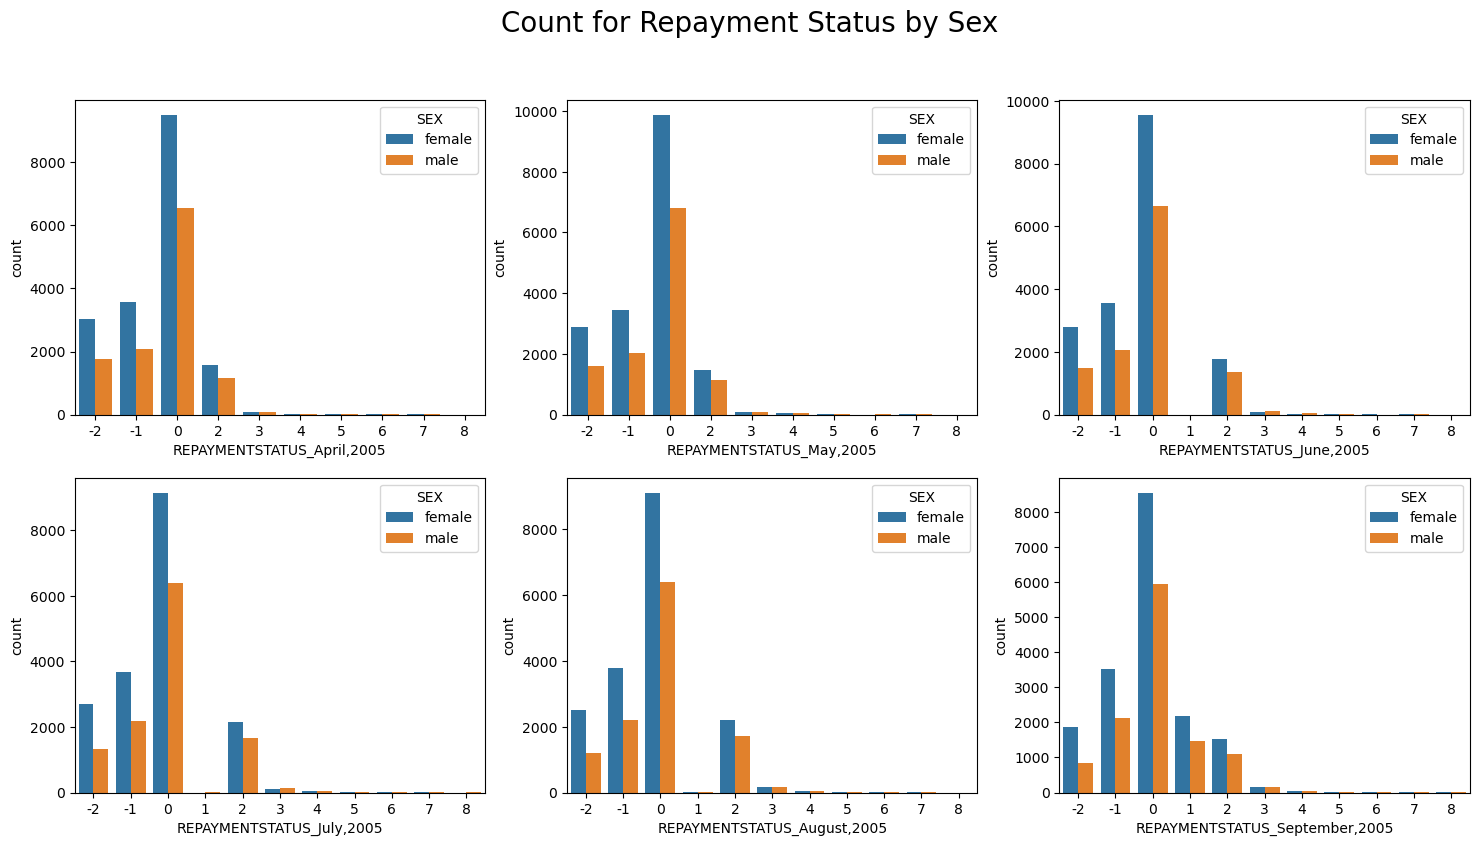

In [68]:
fig=plt.figure(figsize=(18,9))
fig.suptitle("Count for Repayment Status by Sex", fontsize=20)
plt.subplot(2,3,1)
sns.countplot(x='REPAYMENTSTATUS_April,2005',hue='SEX',data=df9)
plt.subplot(2,3,2)
sns.countplot(x='REPAYMENTSTATUS_May,2005',hue='SEX',data=df9)
plt.subplot(2,3,3)
sns.countplot(x='REPAYMENTSTATUS_June,2005',hue='SEX',data=df9)
plt.subplot(2,3,4)
sns.countplot(x='REPAYMENTSTATUS_July,2005',hue='SEX',data=df9)
plt.subplot(2,3,5)
sns.countplot(x='REPAYMENTSTATUS_August,2005',hue='SEX',data=df9)
plt.subplot(2,3,6)
sns.countplot(x='REPAYMENTSTATUS_September,2005',hue='SEX',data=df9)
plt.show()

In [2]:
# Most of the sample clients paid their bill no late than two months, 
# and the counts for repayment statues divided by gender looks simliar with each other from April to September.

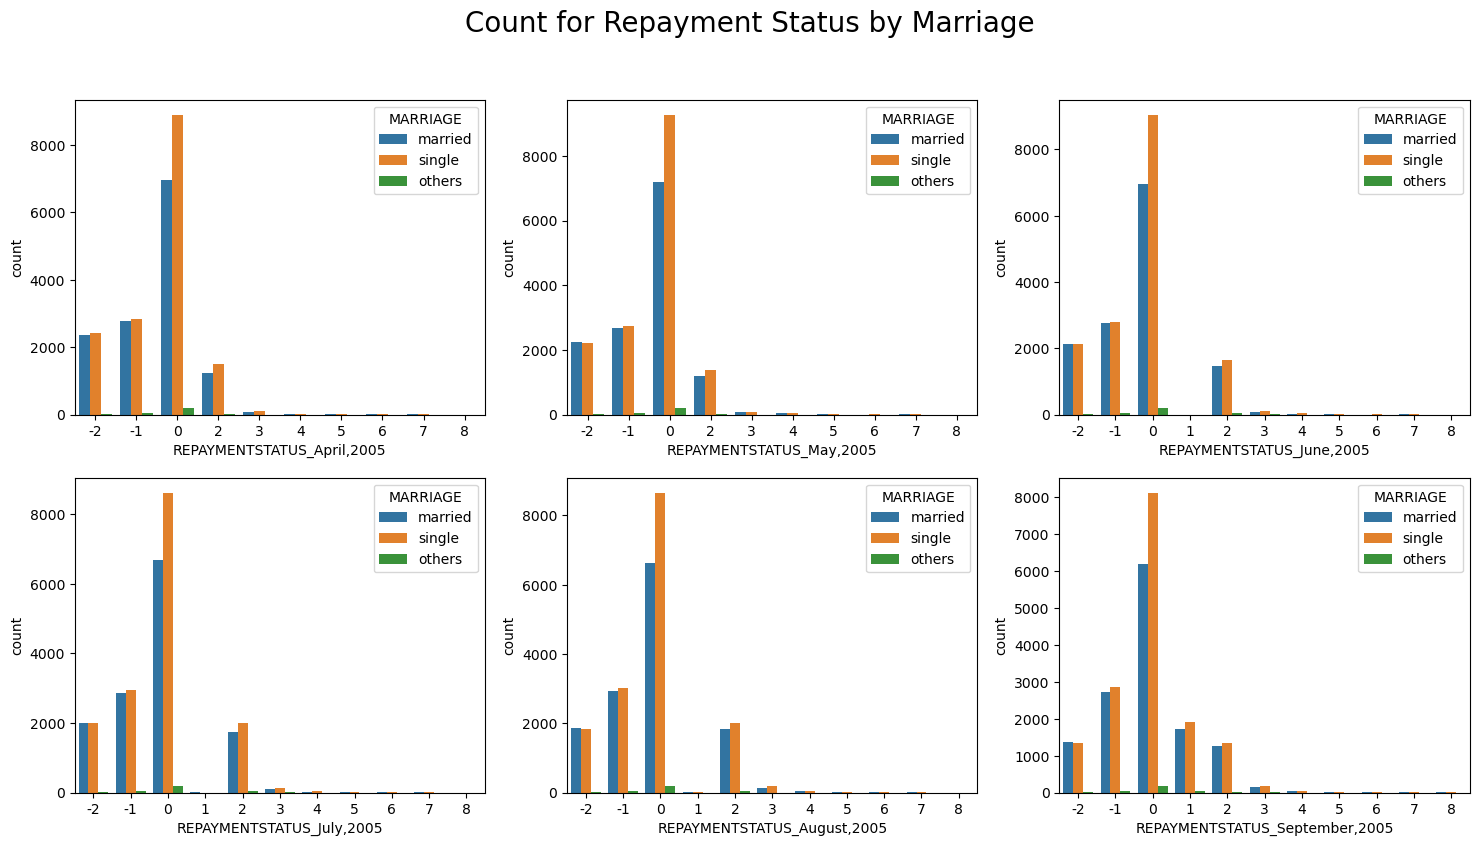

In [76]:
fig2=plt.figure(figsize=(18,9))
fig2.suptitle("Count for Repayment Status by Marriage", fontsize=20)
plt.subplot(2,3,1)
sns.countplot(x='REPAYMENTSTATUS_April,2005',hue='MARRIAGE',data=df9)
plt.subplot(2,3,2)
sns.countplot(x='REPAYMENTSTATUS_May,2005',hue='MARRIAGE',data=df9)
plt.subplot(2,3,3)
sns.countplot(x='REPAYMENTSTATUS_June,2005',hue='MARRIAGE',data=df9)
plt.subplot(2,3,4)
sns.countplot(x='REPAYMENTSTATUS_July,2005',hue='MARRIAGE',data=df9)
plt.subplot(2,3,5)
sns.countplot(x='REPAYMENTSTATUS_August,2005',hue='MARRIAGE',data=df9)
plt.subplot(2,3,6)
sns.countplot(x='REPAYMENTSTATUS_September,2005',hue='MARRIAGE',data=df9)
plt.show()

In [ ]:
# The pattern for repayment status divided by marriage status looks simliar through April to September.

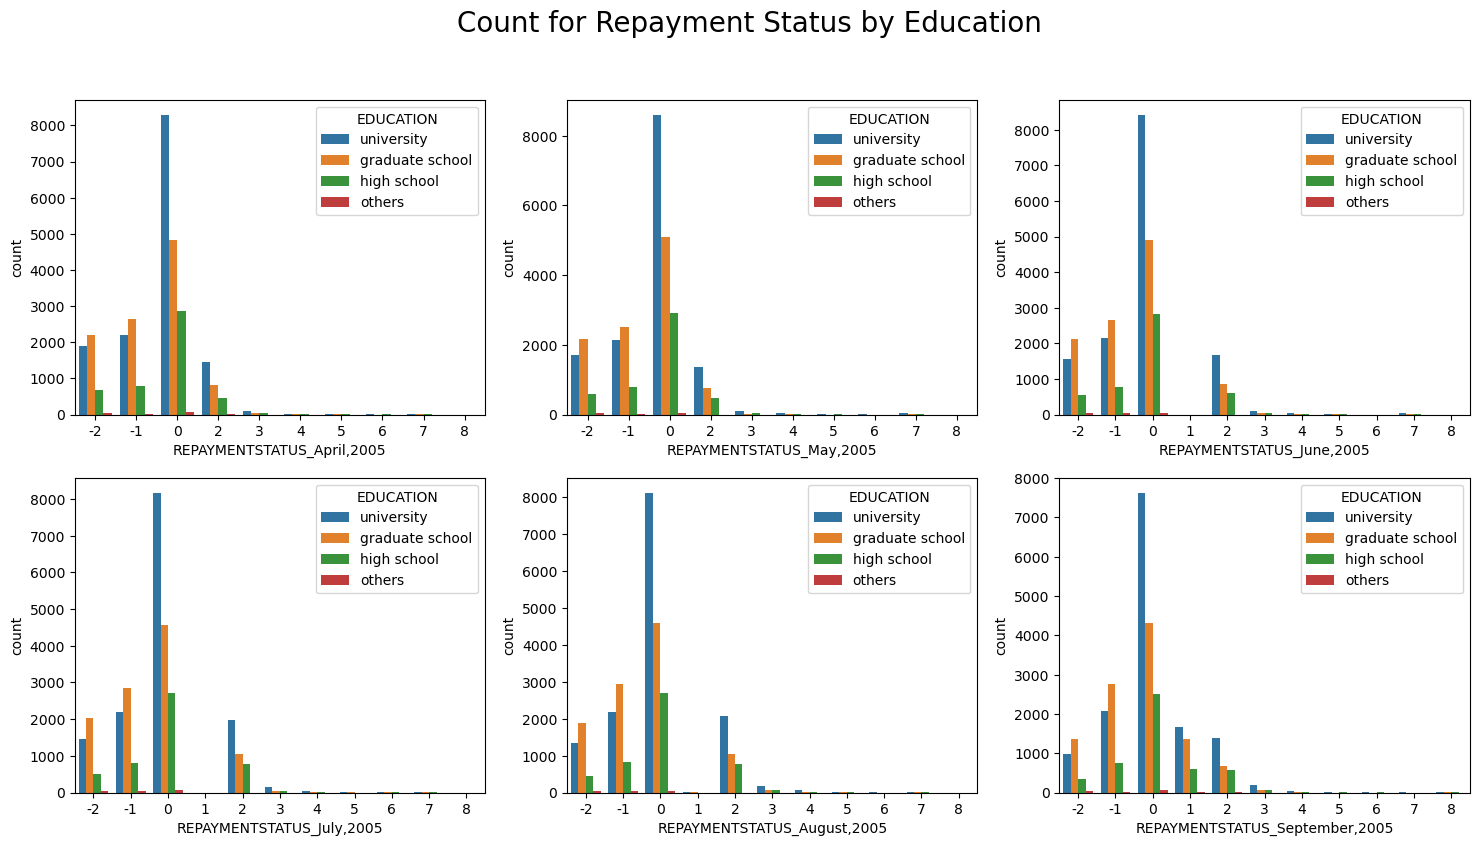

In [77]:
fig3=plt.figure(figsize=(18,9))
fig3.suptitle("Count for Repayment Status by Education", fontsize=20)
plt.subplot(2,3,1)
sns.countplot(x='REPAYMENTSTATUS_April,2005',hue='EDUCATION',data=df9)
plt.subplot(2,3,2)
sns.countplot(x='REPAYMENTSTATUS_May,2005',hue='EDUCATION',data=df9)
plt.subplot(2,3,3)
sns.countplot(x='REPAYMENTSTATUS_June,2005',hue='EDUCATION',data=df9)
plt.subplot(2,3,4)
sns.countplot(x='REPAYMENTSTATUS_July,2005',hue='EDUCATION',data=df9)
plt.subplot(2,3,5)
sns.countplot(x='REPAYMENTSTATUS_August,2005',hue='EDUCATION',data=df9)
plt.subplot(2,3,6)
sns.countplot(x='REPAYMENTSTATUS_September,2005',hue='EDUCATION',data=df9)
plt.show()

In [1]:
# The pattern for repayment status divided by education level looks simliar through April to September, and mainly concentrate near pay duly to delay for two months.

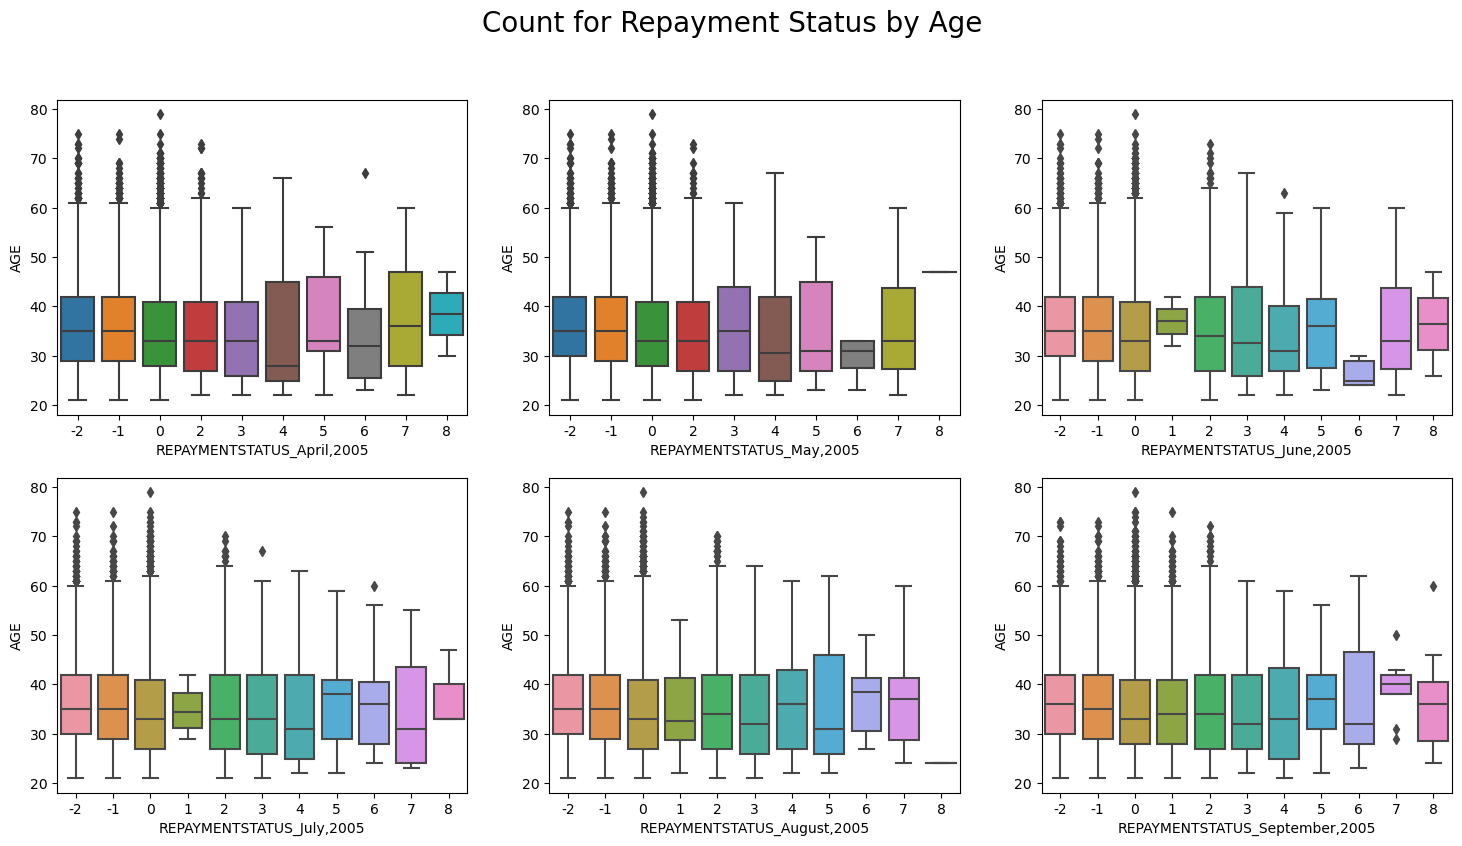

In [78]:
fig4=plt.figure(figsize=(18,9))
fig4.suptitle("Count for Repayment Status by Age", fontsize=20)
plt.subplot(2,3,1)
sns.boxplot(x='REPAYMENTSTATUS_April,2005',y='AGE',data=df9)
plt.subplot(2,3,2)
sns.boxplot(x='REPAYMENTSTATUS_May,2005',y='AGE',data=df9)
plt.subplot(2,3,3)
sns.boxplot(x='REPAYMENTSTATUS_June,2005',y='AGE',data=df9)
plt.subplot(2,3,4)
sns.boxplot(x='REPAYMENTSTATUS_July,2005',y='AGE',data=df9)
plt.subplot(2,3,5)
sns.boxplot(x='REPAYMENTSTATUS_August,2005',y='AGE',data=df9)
plt.subplot(2,3,6)
sns.boxplot(x='REPAYMENTSTATUS_September,2005',y='AGE',data=df9)
plt.show()